In [82]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import os
import sys
from mpl_toolkits.mplot3d import Axes3D

In [83]:
def set_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    y_range = abs(y_limits[1] - y_limits[0])
    z_range = abs(z_limits[1] - z_limits[0])

    max_range = max(x_range, y_range, z_range)

    x_mid = sum(x_limits) / 2
    y_mid = sum(y_limits) / 2
    z_mid = sum(z_limits) / 2

    ax.set_xlim3d(x_mid - max_range / 2, x_mid + max_range / 2)
    ax.set_ylim3d(y_mid - max_range / 2, y_mid + max_range / 2)
    ax.set_zlim3d(z_mid - max_range / 2, z_mid + max_range / 2)


import numpy as np


def plot_sphere(ax, center, radius=0.2, color="red", alpha=0.6, resolution=20):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)

    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones_like(u), np.cos(v))

    ax.plot_surface(x, y, z, color=color, alpha=alpha, linewidth=0)

In [ ]:
def plot_player_pos(player_df: pd.DataFrame, waypoint_df: pd.DataFrame):
    """
    time,pose.position.x,pose.position.y,pose.position.z,pose.orientation.x,pose.orientation.y,pose.orientation.z,pose.orientation.w
    time,poses[0].position.x,poses[0].position.y,poses[0].position.z,poses[0].orientation.x,poses[0].orientation.y,poses[0].orientation.z,poses[0].orientation.w,poses[1].position.x,poses[1].position.y,poses[1].position.z,poses[1].orientation.x,poses[1].orientation.y,poses[1].orientation.z,poses[1].orientation.w,poses[2].position.x,poses[2].position.y,poses[2].position.z,poses[2].orientation.x,poses[2].orientation.y,poses[2].orientation.z,poses[2].orientation.w,poses[3].position.x,poses[3].position.y,poses[3].position.z,poses[3].orientation.x,poses[3].orientation.y,poses[3].orientation.z,poses[3].orientation.w,poses[4].position.x,poses[4].position.y,poses[4].position.z,poses[4].orientation.x,poses[4].orientation.y,poses[4].orientation.z,poses[4].orientation.w,poses[5].position.x,poses[5].position.y,poses[5].position.z,poses[5].orientation.x,poses[5].orientation.y,poses[5].orientation.z,poses[5].orientation.w,poses[6].position.x,poses[6].position.y,poses[6].position.z,poses[6].orientation.x,poses[6].orientation.y,poses[6].orientation.z,poses[6].orientation.w,poses[7].position.x,poses[7].position.y,poses[7].position.z,poses[7].orientation.x,poses[7].orientation.y,poses[7].orientation.z,poses[7].orientation.w,poses[8].position.x,poses[8].position.y,poses[8].position.z,poses[8].orientation.x,poses[8].orientation.y,poses[8].orientation.z,poses[8].orientation.w,poses[9].position.x,poses[9].position.y,poses[9].position.z,poses[9].orientation.x,poses[9].orientation.y,poses[9].orientation.z,poses[9].orientation.w,poses[10].position.x,poses[10].position.y,poses[10].position.z,poses[10].orientation.x,poses[10].orientation.y,poses[10].orientation.z,poses[10].orientation.w,poses[11].position.x,poses[11].position.y,poses[11].position.z,poses[11].orientation.x,poses[11].orientation.y,poses[11].orientation.z,poses[11].orientation.w
    """
    times = player_df["time"]
    xs = player_df["pose.position.x"].to_numpy()
    ys = player_df["pose.position.y"].to_numpy()
    zs = player_df["pose.position.z"].to_numpy()

    waypoint_positions = [
        [
            waypoint_df[f"poses[{i}].position.x"].to_numpy()[0],
            waypoint_df[f"poses[{i}].position.y"].to_numpy()[0],
            waypoint_df[f"poses[{i}].position.z"].to_numpy()[0],
        ]
        for i in range(12)
    ]

    fig = plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(111, projection="3d")
    ax.plot(xs, ys, zs, label="Player Position", color="blue", alpha=0.7)

    for wp in waypoint_positions:
        dist = np.vstack((xs, ys, zs))

        dists = np.linalg.norm(dist.T - np.array(wp), axis=1)
        min_dist_idx = np.argmin(dists)
        min_dist = dists[min_dist_idx]

        plot_sphere(
            ax, wp, radius=0.5, color="green" if min_dist < 0.5 else "red", alpha=0.5
        )

    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_zlabel("Z Position")
    ax.set_title("Player Position and Waypoints")

    # ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
    # ax.axis("equal")
    set_axes_equal(ax)

    ax.legend()
    plt.show()


def plot_player_pos_2d(player_df: pd.DataFrame, waypoint_df: pd.DataFrame):
    times = player_df["time"]

    print(f"Time range: {times.iloc[-1] - times.iloc[0]:.2f}s")

    xs = player_df["pose.position.x"].to_numpy()
    ys = player_df["pose.position.y"].to_numpy()
    zs = player_df["pose.position.z"].to_numpy()

    waypoint_positions = [
        [
            waypoint_df[f"poses[{i}].position.x"].to_numpy()[0],
            waypoint_df[f"poses[{i}].position.y"].to_numpy()[0],
            waypoint_df[f"poses[{i}].position.z"].to_numpy()[0],
        ]
        for i in range(12)
    ]

    fig = plt.figure(figsize=(10, 10))

    plt.plot(xs, ys, label="Player Position", color="blue", alpha=0.7)

    plt.show()


def plot_recognition(recog_df: pd.DataFrame):
    """
    time,data
    """

    def parse_label(label_str):
        try:
            if label_str == "unknown":
                return 0
            elif label_str == "pointing":
                return 1
            else:
                return -1
        except ValueError:
            return -1  # or some other default value for unrecognized labels

    def plot_label_pie(labels: np.ndarray):
        # 값과 개수 계산
        values, counts = np.unique(labels, return_counts=True)

        # 표시 순서 고정 (0, 1)
        order = [-1, 0, 1]
        count_map = {v: 0 for v in order}
        for v, c in zip(values, counts):
            count_map[v] = c

        sizes = [count_map[v] for v in order]
        names = ["-1", "0", "1"]

        plt.figure(figsize=(6, 6))
        plt.pie(
            sizes,
            labels=names,
            autopct=lambda p: f"{p:.1f}%" if p > 0 else "",
            startangle=90,
        )
        plt.title("Label Distribution")
        plt.axis("equal")
        plt.show()

    times = recog_df["time"].to_numpy()
    labels = recog_df["data"].apply(parse_label).to_numpy()
    labels_diff = np.diff(labels, prepend=labels[0])

    plt.figure(figsize=(12, 6))
    plt.scatter(times, labels, color="blue")
    plt.yticks(np.unique(labels))
    plt.xlabel("Time (s)")
    plt.ylabel("Recognized Label")
    plt.title("Gesture Recognition Over Time")
    plt.grid(True)
    plt.show()

    plot_label_pie(labels)

    plt.figure(figsize=(12, 6))
    plt.scatter(times, labels_diff, color="blue")
    plt.yticks(np.unique(labels))
    plt.xlabel("Time (s)")
    plt.ylabel("Recognized Label")
    plt.title("Gesture Recognition Over Time")
    plt.grid(True)
    plt.show()

    plot_label_pie(labels_diff)

In [85]:
def run(visual: str, no_visual: str):
    player_pos = "player_pose.csv"
    waypoints = "waypoint_array.csv"
    gestures = "gesture_recognition.csv"

    # csv_files = os.listdir(no_visual)

    player_pos_df = pd.read_csv(os.path.join(no_visual, player_pos))
    waypoints_df = pd.read_csv(os.path.join(no_visual, waypoints))
    recognition_df = pd.read_csv(os.path.join(no_visual, gestures))

    print("#### No Visual #####")
    plot_player_pos(player_pos_df, waypoints_df)
    plot_player_pos_2d(player_pos_df, waypoints_df)
    plot_recognition(recognition_df)

    # csv_files = os.listdir(visual)

    player_pos_df = pd.read_csv(os.path.join(visual, player_pos))
    waypoints_df = pd.read_csv(os.path.join(visual, waypoints))
    recognition_df = pd.read_csv(os.path.join(visual, gestures))

    print("#### Visual #####")
    plot_player_pos(player_pos_df, waypoints_df)
    plot_player_pos_2d(player_pos_df, waypoints_df)
    plot_recognition(recognition_df)

## 오재홍

#### No Visual #####


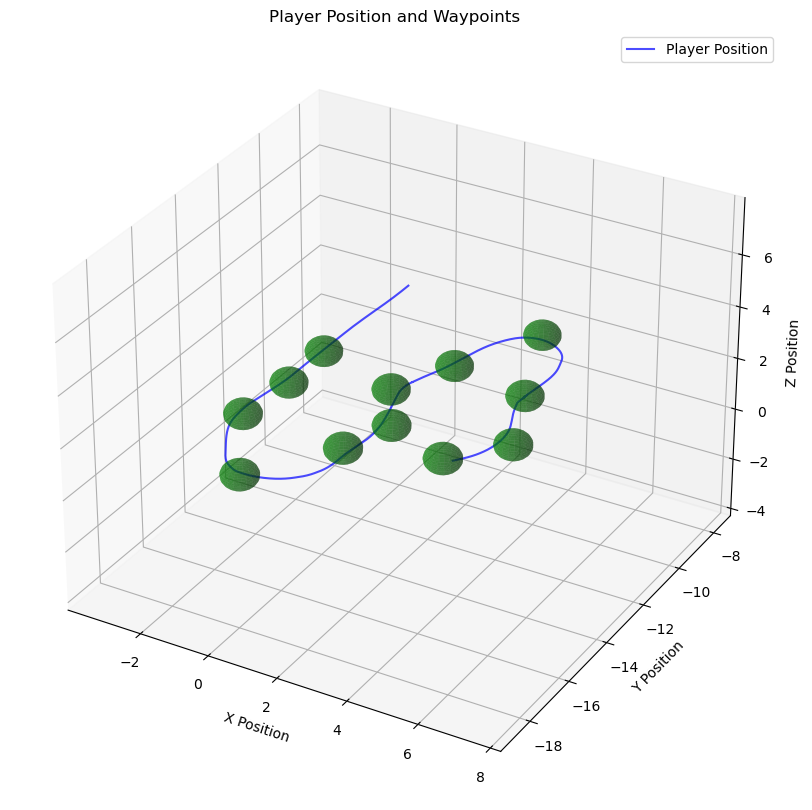

Time range: 100.30s


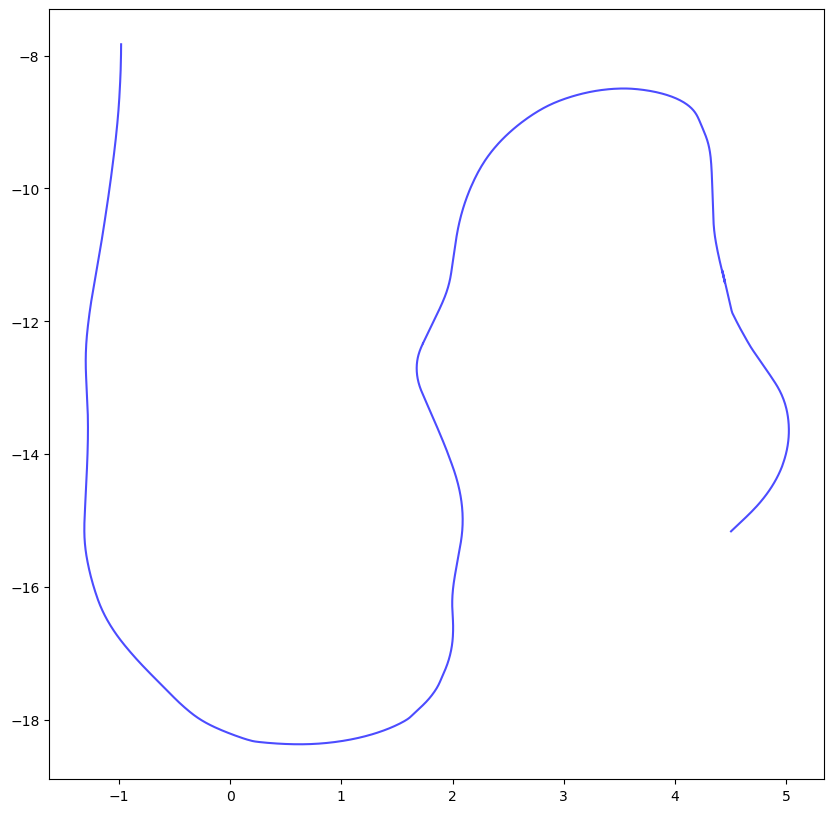

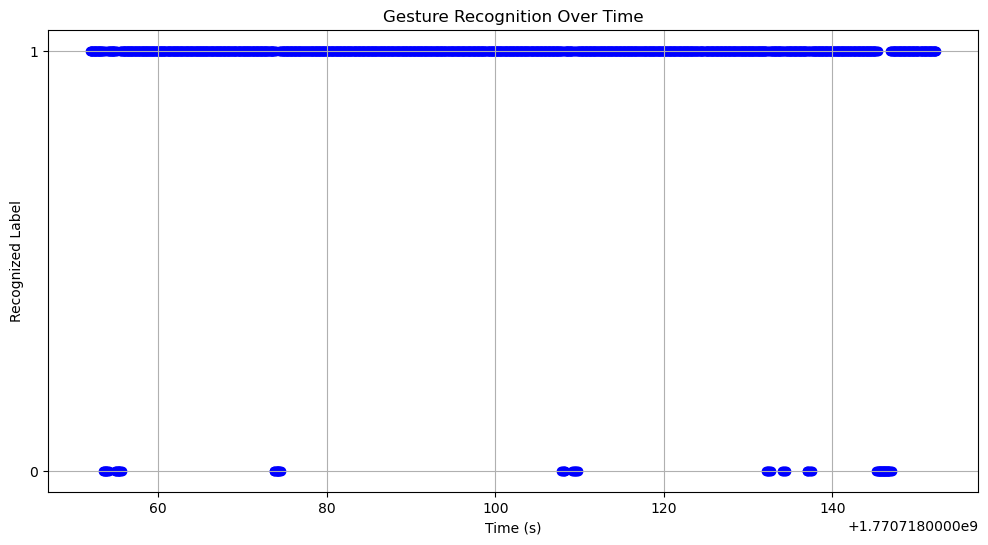

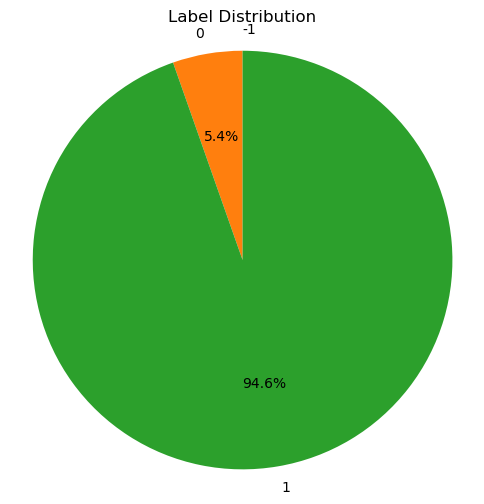

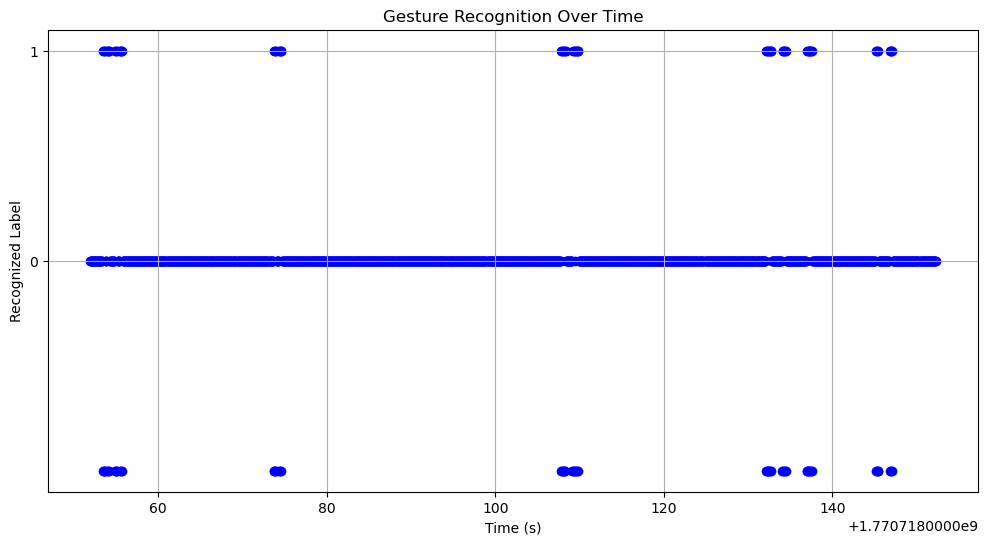

#### Visual #####


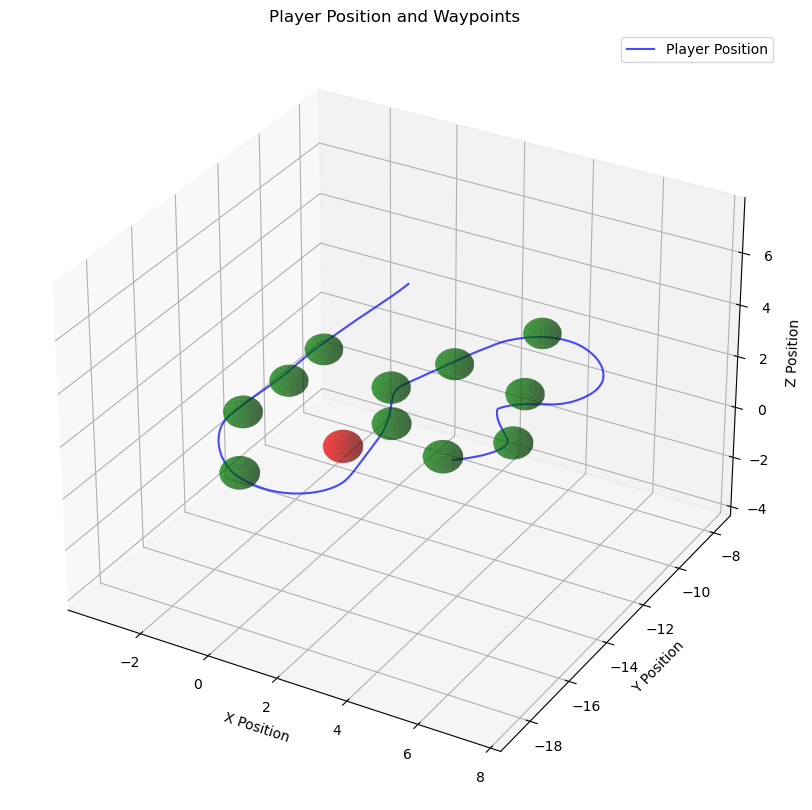

Time range: 96.02s


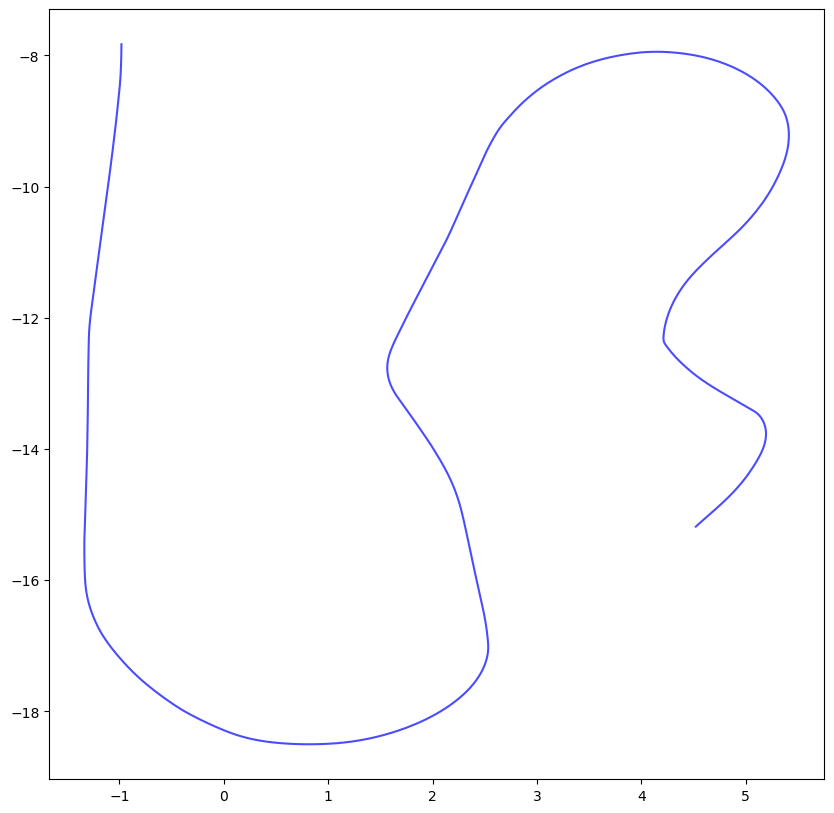

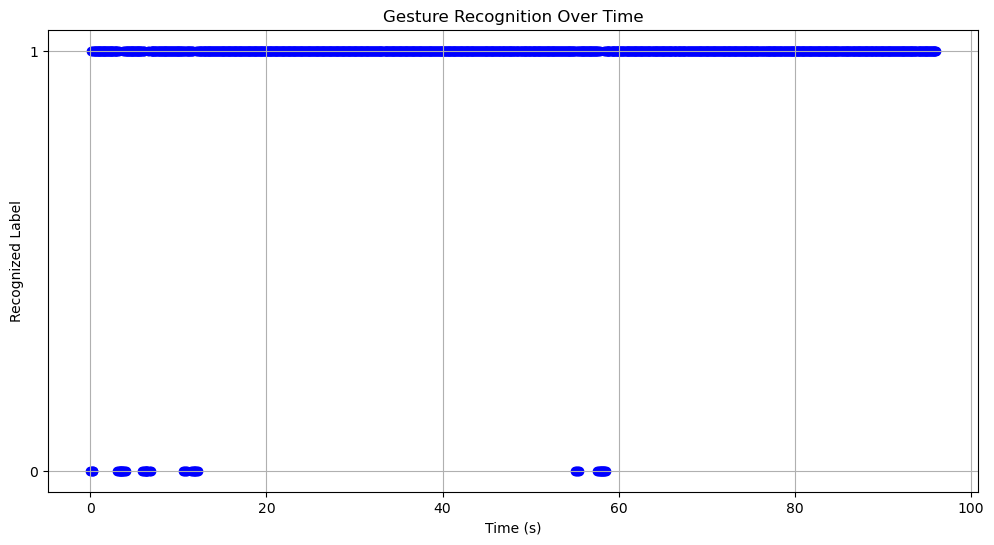

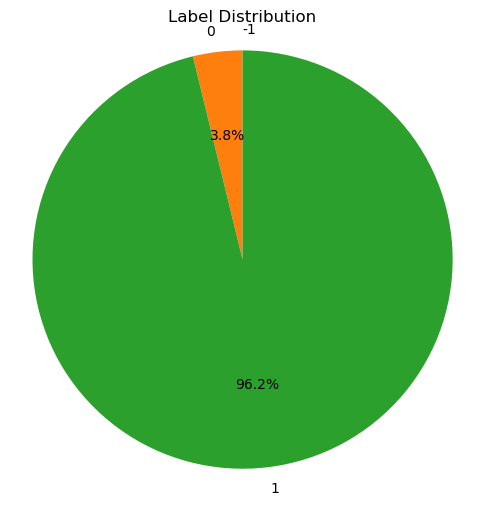

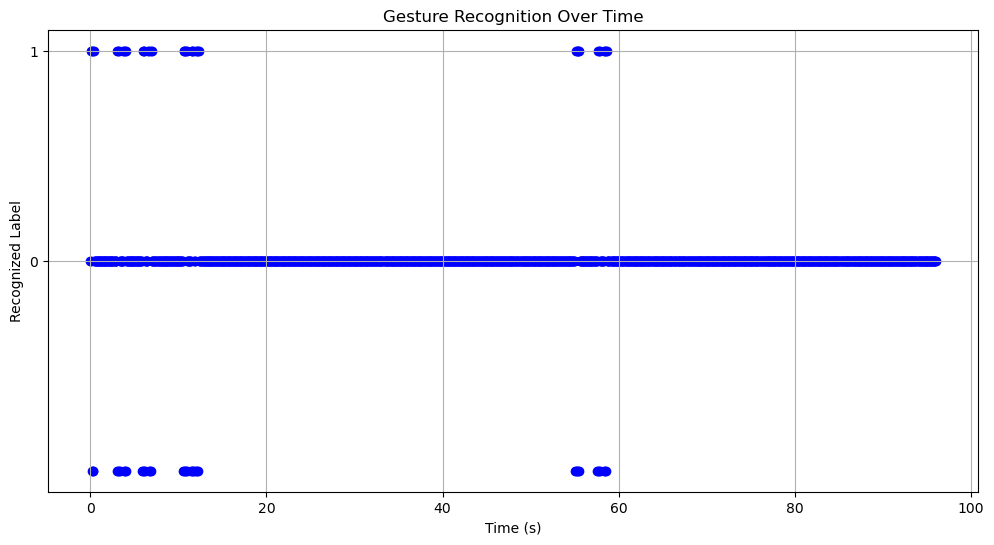

In [86]:
no_visual = "/home/min/7cmdehdrb/fuck_flight/JH_no_visual"
visual = "/home/min/7cmdehdrb/fuck_flight/JH_visual"

run(visual, no_visual)

## 민영

#### No Visual #####


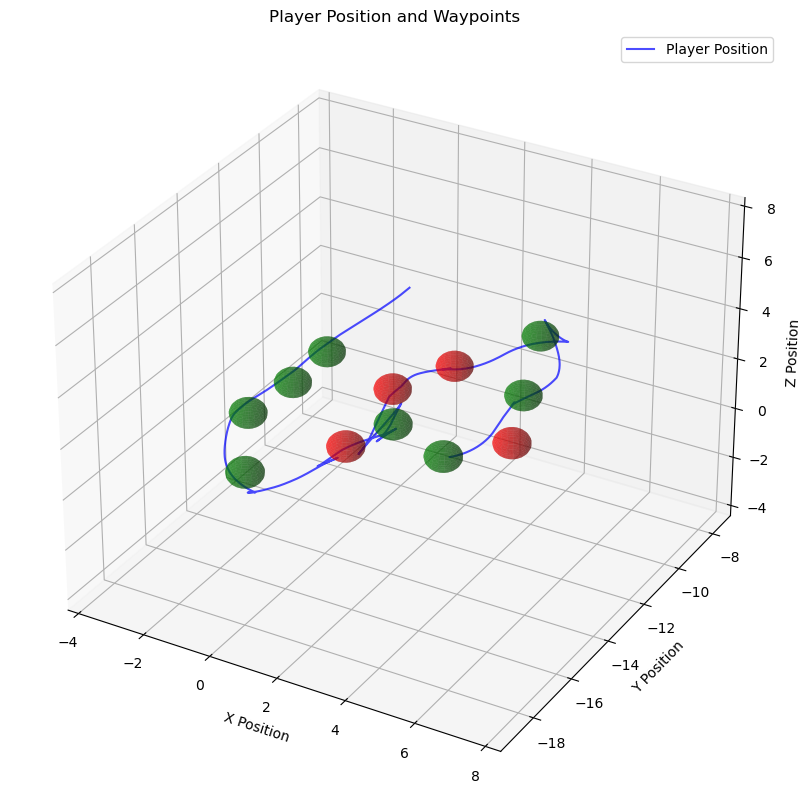

Time range: 277.40s


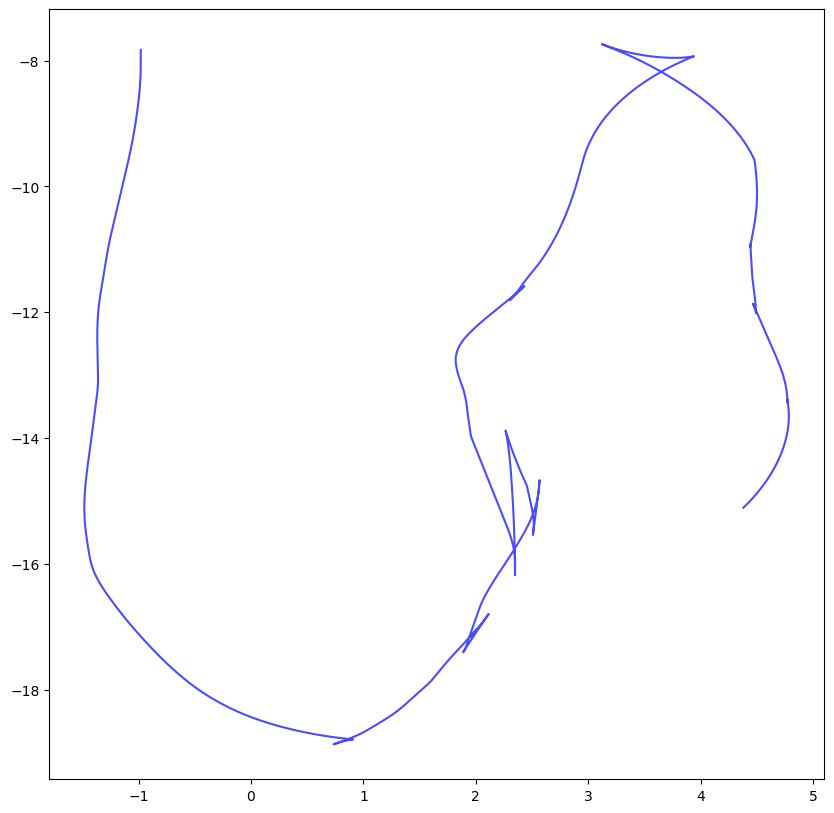

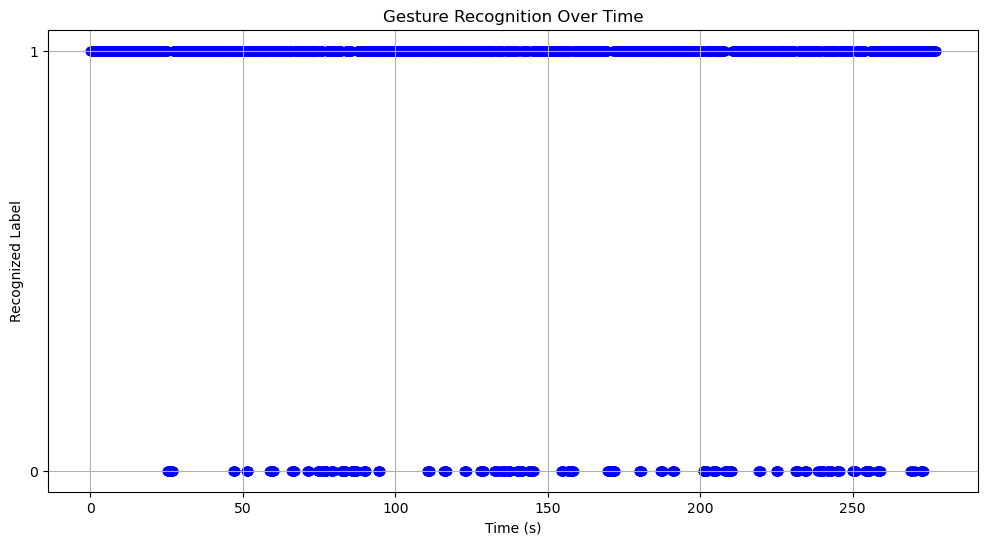

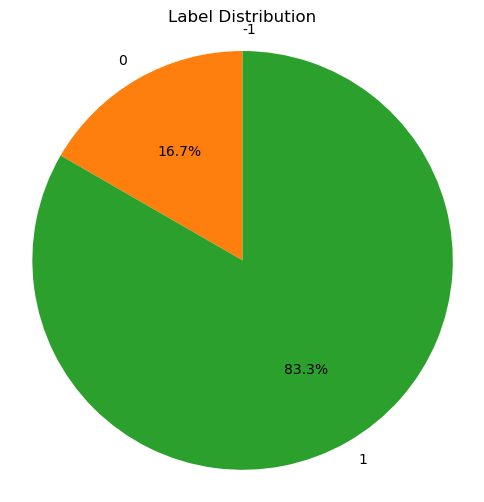

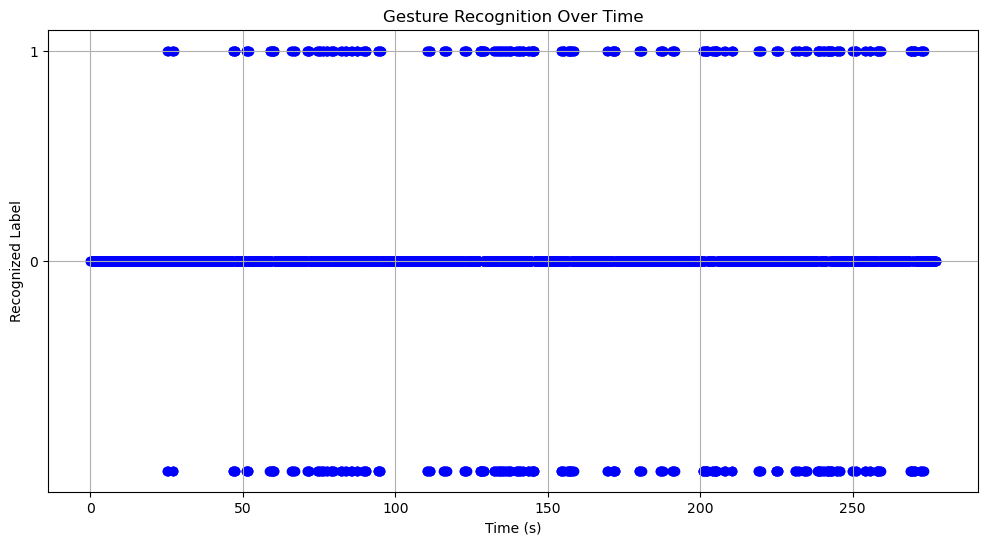

#### Visual #####


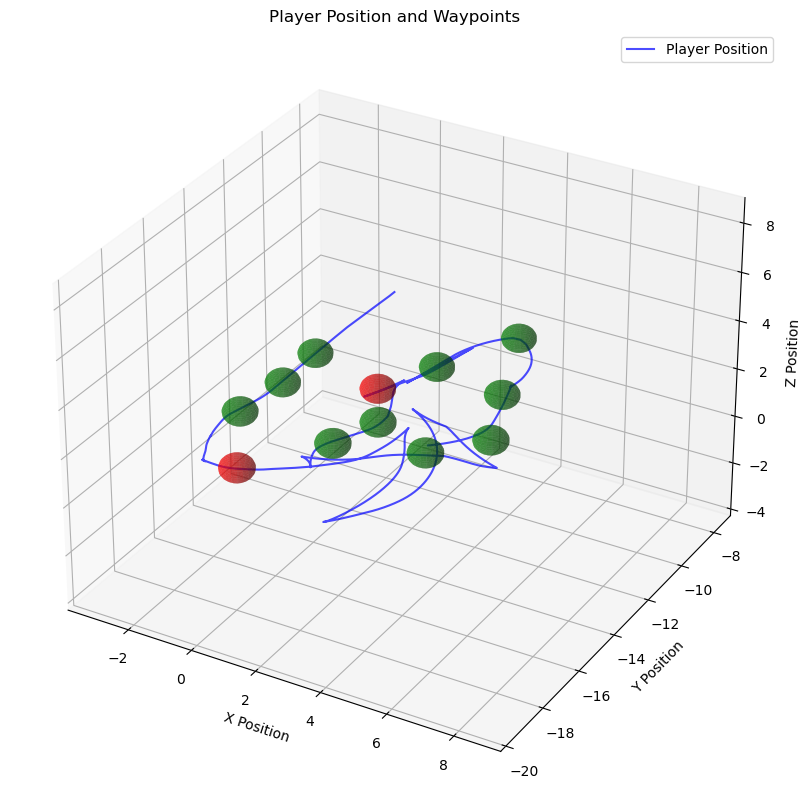

Time range: 439.31s


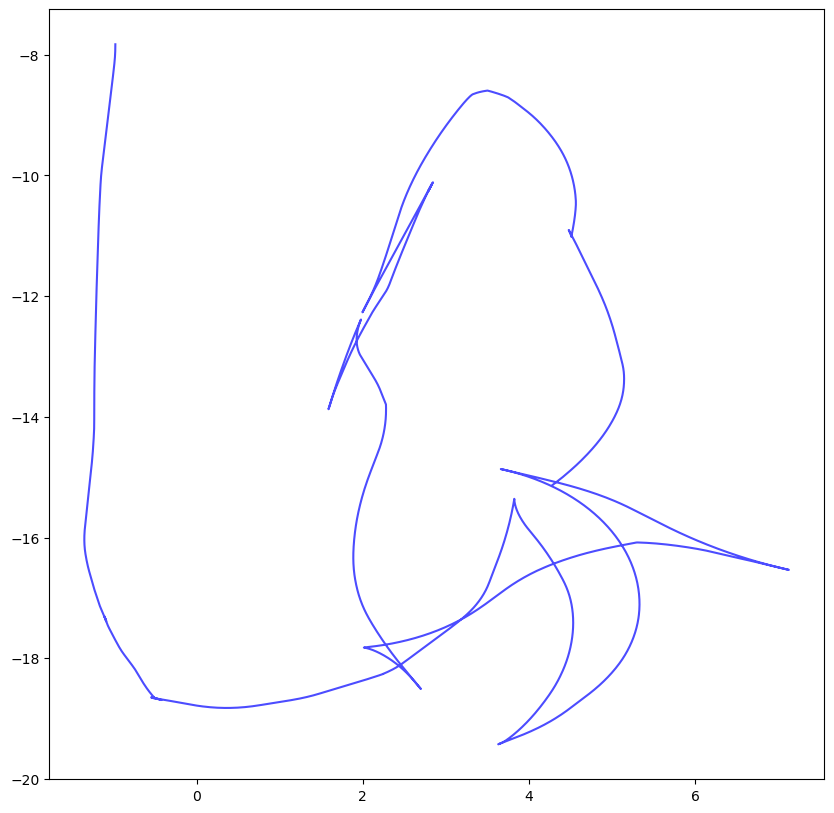

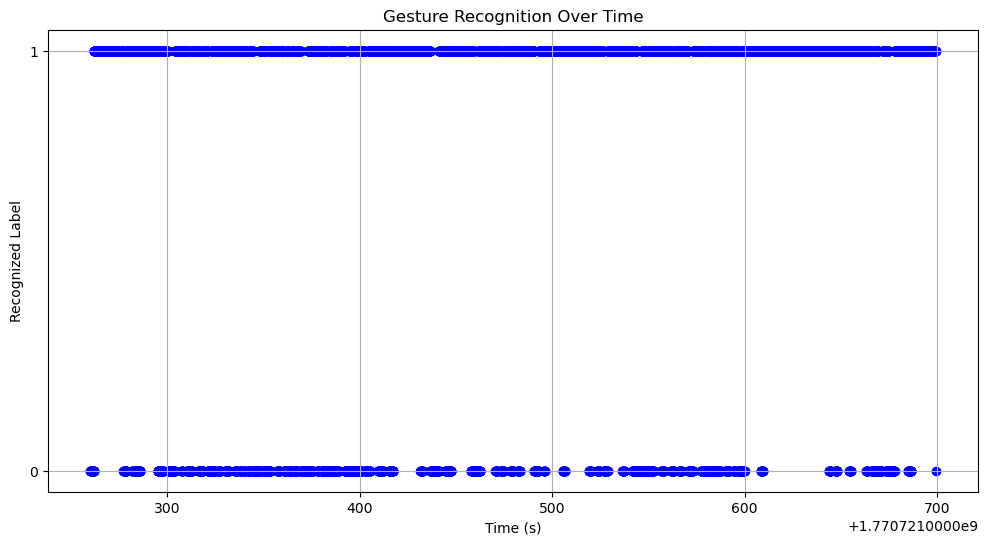

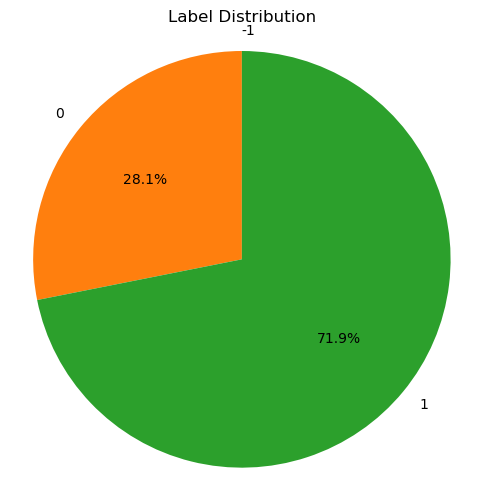

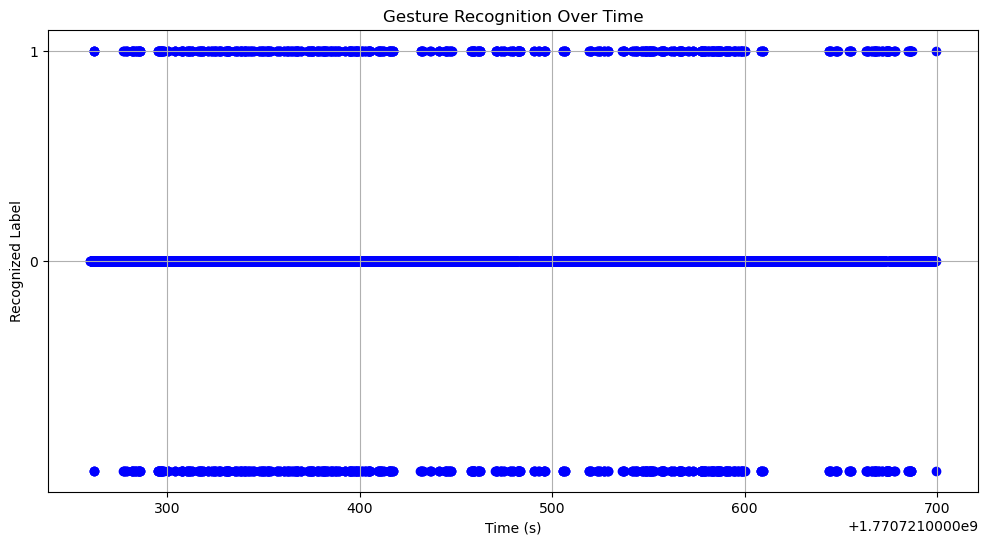

In [87]:
no_visual = "/home/min/7cmdehdrb/fuck_flight/MY_no_visual"
visual = "/home/min/7cmdehdrb/fuck_flight/MY_visual"

run(visual, no_visual)